In [6]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors, rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels

data = pd.read_excel('/Users/NAITO/dong/melting_temperature median.xlsx')
data = data.iloc[:, :6]
PandasTools.AddMoleculeColumnToFrame(frame=data, smilesCol='smi')
data.columns = ['PID', 'name', 'Mw', 'SMILES', 'cu_formula', 'Tm', 'mol']

def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] 
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles
Canon_SMILES = canonical_smiles(data.SMILES)
duplicates_smiles = data[data['SMILES'].duplicated()]['SMILES'].values
data = data.drop_duplicates(subset=['SMILES'])

def GetNumCarbons(mol):
    count = 0
    for atom in mol.GetAtoms():
        if atom.GetSymbol() == 'C':
            count += 1
    return count
data['AromaticRings'] = data.mol.map(Descriptors.NumAromaticRings)
data['AliphaticRings'] = data.mol.map(Descriptors.NumAliphaticRings)
data['SaturatedRings'] = data.mol.map(Descriptors.NumSaturatedRings)
data['RotatableBonds'] = data.mol.map(Descriptors.NumRotatableBonds)
#data['AromaticProportion'] = data.mol.map(lambda x: len(x.GetAromaticAtoms())/x.GetNumHeavyAtoms())
data['AromaticProportion'] = data.mol.map(lambda x: len(x.GetAromaticAtoms()))
#data['NonCarbonProportion'] = data.mol.map(lambda x: 1 - GetNumCarbons(x)/x.GetNumHeavyAtoms())
data['NonCarbonProportion'] = data.mol.map(lambda x: 1 - GetNumCarbons(x))
data['HAcceptors'] = data.mol.map(Descriptors.NumHAcceptors)
data['HDonors'] = data.mol.map(Descriptors.NumHDonors)
data['HeavyAtom'] = data.mol.map(Descriptors.HeavyAtomCount)
data['NHOH'] = data.mol.map(Descriptors.NHOHCount)
data['NO'] = data.mol.map(Descriptors.NOCount)
data['Hetero'] = data.mol.map(Descriptors.NumHeteroatoms)
data['Amide'] = data.mol.map(rdMolDescriptors.CalcNumAmideBonds)

data = data.drop('mol',  axis=1)

data

,PID,name,Mw,SMILES,cu_formula,Tm,AromaticRings,AliphaticRings,SaturatedRings,RotatableBonds,AromaticProportion,NonCarbonProportion,HAcceptors,HDonors,HeavyAtom,NHOH,NO,Hetero,Amide
0,P010001,polyethene,14.03,*C*,CH2,131.0,0,0,0,0,0,0,0,0,1,0,0,2,0
1,P010002,poly(prop-1-ene),42.08,*CC(C)*,C3H6,163.0,0,0,0,1,0,-2,0,0,3,0,0,2,0
2,P010003,poly(but-1-ene),56.11,*CC(CC)*,C4H8,115.5,0,0,0,2,0,-3,0,0,4,0,0,2,0
3,P010004,poly(pent-1-ene),70.13,CCCC(C*)*,C5H10,80.0,0,0,0,3,0,-4,0,0,5,0,0,2,0
4,P010006,poly(3-methylbut-1-ene),70.13,*CC(C(C)C)*,C5H10,305.5,0,0,0,2,0,-4,0,0,5,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,P522015,"poly(2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9-hexadecaf...",504.14,*CC(C(=O)OCC(C(C(C(C(C(C(C(F)F)(F)F)(F)F)(F)F)...,C12H5F17O2,159.0,0,0,0,11,0,-11,2,0,31,0,2,21,0
3893,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",336.13,*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,C9H6F10O2,91.0,0,0,0,7,0,-8,2,0,21,0,2,14,0
3894,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",436.14,*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,C11H6F14O2,104.0,0,0,0,9,0,-10,2,0,27,0,2,18,0
3895,P522018,"poly(3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,1...",636.17,*CC(C(=O)OCCC(C(C(C(C(C(C(C(C(C(F)(F)F)(F)F)(F...,C15H6F22O2,157.0,0,0,0,13,0,-14,2,0,39,0,2,26,0


<Figure size 1200x800 with 0 Axes>

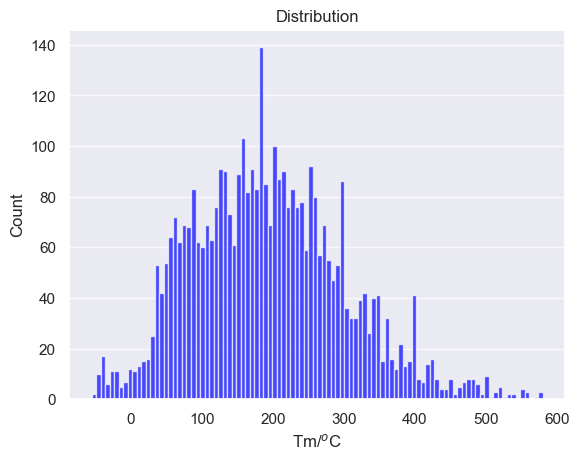

In [1]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels

data = pd.read_excel("/Users/NAITO/dong/melting_temperature median.xlsx")
data = data.iloc[:, :6]
PandasTools.AddMoleculeColumnToFrame(frame=data, smilesCol='smi')
data.columns = ['PID', 'name', 'Mw', 'SMILES', 'cu_formula', 'Tm', 'mol']

plt.figure(figsize=[12,8])
data.hist(column="Tm", grid=False, bins=100, color='blue', alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tm/$^o$C')
plt.ylabel('Count')
plt.title('Distribution')
plt.show()

In [11]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors, rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels

data = pd.read_excel('/Users/NAITO/dong/melting_temperature median.xlsx')
data = data.iloc[:, :6]
PandasTools.AddMoleculeColumnToFrame(frame=data, smilesCol='smi')
data.columns = ['PID', 'name', 'Mw', 'SMILES', 'cu_formula', 'Tm', 'mol']

def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] 
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles
Canon_SMILES = canonical_smiles(data.SMILES)
duplicates_smiles = data[data['SMILES'].duplicated()]['SMILES'].values
data = data.drop_duplicates(subset=['SMILES'])

def GetNumCarbons(mol):
    count = 0
    for atom in mol.GetAtoms():
        if atom.GetSymbol() == 'C':
            count += 1
    return count
data['AromaticRings'] = data.mol.map(Descriptors.NumAromaticRings)
data['AliphaticRings'] = data.mol.map(Descriptors.NumAliphaticRings)
data['SaturatedRings'] = data.mol.map(Descriptors.NumSaturatedRings)
data['RotatableBonds'] = data.mol.map(Descriptors.NumRotatableBonds)
#data['AromaticProportion'] = data.mol.map(lambda x: len(x.GetAromaticAtoms())/x.GetNumHeavyAtoms())
data['AromaticProportion'] = data.mol.map(lambda x: len(x.GetAromaticAtoms()))
#data['NonCarbonProportion'] = data.mol.map(lambda x: 1 - GetNumCarbons(x)/x.GetNumHeavyAtoms())
data['NonCarbonProportion'] = data.mol.map(lambda x: x.GetNumHeavyAtoms() - GetNumCarbons(x))
data['HAcceptors'] = data.mol.map(Descriptors.NumHAcceptors)
data['HDonors'] = data.mol.map(Descriptors.NumHDonors)
data['HeavyAtom'] = data.mol.map(Descriptors.HeavyAtomCount)
data['NHOH'] = data.mol.map(Descriptors.NHOHCount)
data['NO'] = data.mol.map(Descriptors.NOCount)
data['Hetero'] = data.mol.map(Descriptors.NumHeteroatoms)
data['Amide'] = data.mol.map(rdMolDescriptors.CalcNumAmideBonds)

data = data.drop('mol',  axis=1)

data.to_csv('output.csv', index=False)




In [7]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors, rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = pd.read_excel('/Users/NAITO/dong/melting_temperature median.xlsx')
data = data.iloc[:, :6]
PandasTools.AddMoleculeColumnToFrame(frame=data, smilesCol='smi')
data.columns = ['PID', 'name', 'Mw', 'SMILES', 'cu_formula', 'Tm', 'mol']

def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] 
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles
Canon_SMILES = canonical_smiles(data.SMILES)
duplicates_smiles = data[data['SMILES'].duplicated()]['SMILES'].values
data = data.drop_duplicates(subset=['SMILES'])

def GetNumCarbons(mol):
    count = 0
    for atom in mol.GetAtoms():
        if atom.GetSymbol() == 'C':
            count += 1
    return count
data['AromaticRings'] = data.mol.map(Descriptors.NumAromaticRings)
data['AliphaticRings'] = data.mol.map(Descriptors.NumAliphaticRings)
data['SaturatedRings'] = data.mol.map(Descriptors.NumSaturatedRings)
data['RotatableBonds'] = data.mol.map(Descriptors.NumRotatableBonds)
#data['AromaticProportion'] = data.mol.map(lambda x: len(x.GetAromaticAtoms())/x.GetNumHeavyAtoms())
data['AromaticProportion'] = data.mol.map(lambda x: len(x.GetAromaticAtoms()))
#data['NonCarbonProportion'] = data.mol.map(lambda x: 1 - GetNumCarbons(x)/x.GetNumHeavyAtoms())
data['NonCarbonProportion'] = data.mol.map(lambda x: x.GetNumHeavyAtoms() - GetNumCarbons(x))
data['HAcceptors'] = data.mol.map(Descriptors.NumHAcceptors)
data['HDonors'] = data.mol.map(Descriptors.NumHDonors)
data['HeavyAtom'] = data.mol.map(Descriptors.HeavyAtomCount)
data['NHOH'] = data.mol.map(Descriptors.NHOHCount)
data['NO'] = data.mol.map(Descriptors.NOCount)
data['Hetero'] = data.mol.map(Descriptors.NumHeteroatoms)
data['Amide'] = data.mol.map(rdMolDescriptors.CalcNumAmideBonds)

X_train, X_test, y_train, y_test = train_test_split(data[['AromaticRings', 'AliphaticRings', 'SaturatedRings', 'RotatableBonds', 'AromaticProportion', 
                                                          'NonCarbonProportion', 'HAcceptors', 'HDonors', 'HeavyAtom', 'NHOH', 'NO', 'Hetero', 'Amide']],
                                                   data.Tm, random_state=0)

X_y_train = X_train.join(y_train)
full_model = smf.ols('Tm ~ AromaticRings + AliphaticRings + SaturatedRings + RotatableBonds + AromaticProportion + NonCarbonProportion + HAcceptors + HDonors + HeavyAtom + NHOH + NO + Hetero + Amide', data=X_y_train).fit()
print(full_model.summary())

#y_pred = full_model.predict(data)
#fig, ax = plt.subplots()
#ax.grid()
#ax.set_axisbelow(True)      #grid line behind elements
#ax.scatter(data.Tm, y_pred, s=10, c='skyblue', marker='o')
#ax.plot([-100,600], [-100,600], 'r-', lw=2.5)
#plt.ylim(-100,600)
#plt.xlim(-100,600)
#ax.set_xlabel('Tm/$^o$C, experimental')
#ax.set_ylabel('Tm/$^o$C, Predicted')
#plt.title('OLSRegression')
#plt.text(300, -50, "$R^2={:.2f}$".format(r2_score(data.Tm, y_pred)),{'color':"darkgoldenrod", 'fontsize':"18"})
#plt.show()

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from io import BytesIO

# Assuming you have already fitted the model and named it full_model
# and you have X_y_train as your training data

# Step 1: Generate the model summary as a text string
summary_text = full_model.summary().as_text()

# Step 2: Convert the text string to an image using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Turn off axis
ax.text(0.1, 0.1, summary_text, fontsize=12, ha='left', va='top')

# Step 3: Save the image to a file or display it
image_path = 'model_summary.png'  # Output image file path
plt.savefig(image_path, bbox_inches='tight', pad_inches=0.1)

# Alternatively, if you want to display it in your Jupyter Notebook:
# plt.show()

# Close the plot to release resources
plt.close()

#print(f"Model summary saved as {image_path}")


                            OLS Regression Results                            
Dep. Variable:                     Tm   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     169.4
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:42:05   Log-Likelihood:                -17019.
No. Observations:                2919   AIC:                         3.407e+04
Df Residuals:                    2905   BIC:                         3.415e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             255.8189    